<a href="https://colab.research.google.com/github/nagavarma9199/neural-networks/blob/main/ICP3_Ques2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [34]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [35]:
print(train_images.shape[1:])

(28, 28)


In [36]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [37]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [38]:
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [39]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 7s 29ms/step - loss: 0.2910 - accuracy: 0.9108 - val_loss: 0.1545 - val_accuracy: 0.9512
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1024 - accuracy: 0.9683 - val_loss: 0.1145 - val_accuracy: 0.9631
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0642 - accuracy: 0.9795 - val_loss: 0.0823 - val_accuracy: 0.9727
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0706 - val_accuracy: 0.9793
Epoch 6/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0941 - val_accuracy: 0.9734
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0732 - val_accuracy: 0.9797

In [44]:
loss_original, accuracy_original = model_original.evaluate(test_data, test_labels_one_hot)


313/313 [==============================] - 2s 6ms/step - loss: 2.0371 - accuracy: 0.8160


In [45]:
print(f"Test Accuracy: {accuracy_original:.4f}")

Test Accuracy: 0.8160


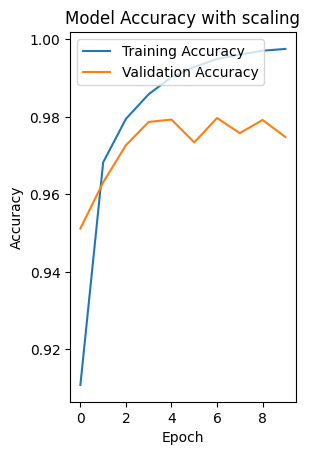

In [46]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with scaling')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

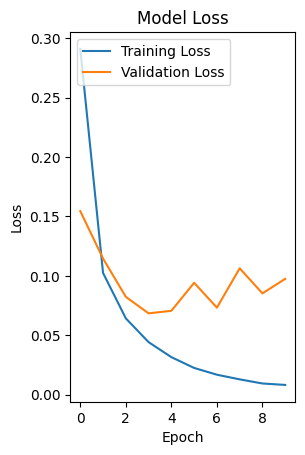

In [42]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image

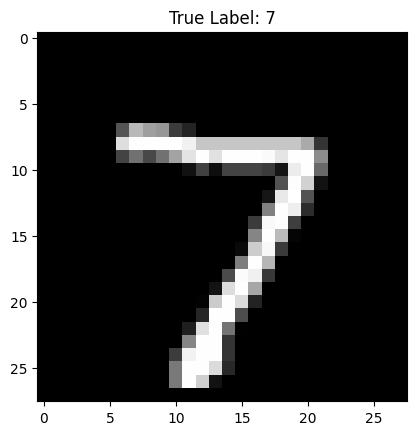

In [19]:
plt.imshow(test_images[0], cmap='gray')
plt.title(f"True Label: {test_labels[0]}")
plt.show()

In [20]:
test_image = test_images[0].reshape(1, -1).astype('float') / 255.0

In [21]:
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

1/1 [==============================] - 0s 178ms/step


In [23]:
print(f"Model Prediction: {predicted_label}")

Model Prediction: 7


We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens.

configuration 1 : tahn

In [24]:
model_tanh = Sequential()
model_tanh.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_tanh.add(Dense(512, activation='tanh'))
model_tanh.add(Dense(512, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))

In [25]:
model_tanh.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with validation
history_tanh = model_tanh.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                              validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 11s 44ms/step - loss: 0.4139 - accuracy: 0.8741 - val_loss: 0.2268 - val_accuracy: 0.9251
Epoch 2/10
235/235 [==============================] - 9s 39ms/step - loss: 0.1526 - accuracy: 0.9541 - val_loss: 0.1261 - val_accuracy: 0.9612
Epoch 3/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0964 - accuracy: 0.9701 - val_loss: 0.1238 - val_accuracy: 0.9603
Epoch 4/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.1387 - val_accuracy: 0.9564
Epoch 5/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0695 - val_accuracy: 0.9765
Epoch 6/10
235/235 [==============================] - 10s 41ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0667 - val_accuracy: 0.9796
Epoch 7/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0994 - val_accuracy: 0.96

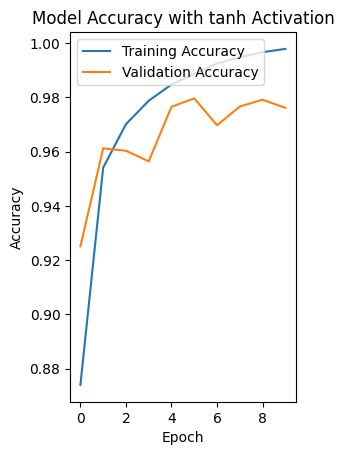

In [26]:
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with tanh Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

configuration 2 : sigmoid

In [27]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

# Compile model
model_sigmoid.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with validation
history_sigmoid = model_sigmoid.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                    validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 9s 27ms/step - loss: 0.7859 - accuracy: 0.7637 - val_loss: 0.3940 - val_accuracy: 0.8751
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.3183 - accuracy: 0.9042 - val_loss: 0.2975 - val_accuracy: 0.9115
Epoch 3/10
235/235 [==============================] - 5s 23ms/step - loss: 0.2627 - accuracy: 0.9222 - val_loss: 0.2884 - val_accuracy: 0.9109
Epoch 4/10
235/235 [==============================] - 9s 39ms/step - loss: 0.2224 - accuracy: 0.9338 - val_loss: 0.2070 - val_accuracy: 0.9364
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1907 - accuracy: 0.9434 - val_loss: 0.2192 - val_accuracy: 0.9307
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1658 - accuracy: 0.9507 - val_loss: 0.2240 - val_accuracy: 0.9261
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1459 - accuracy: 0.9568 - val_loss: 0.1604 - val_accuracy: 0.9500

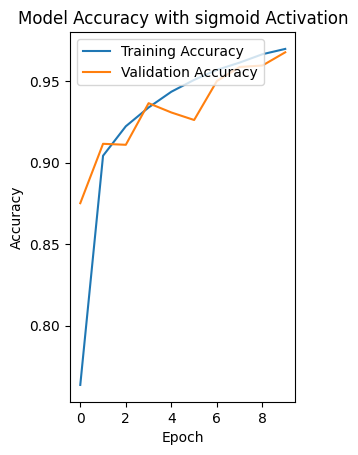

In [28]:
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with sigmoid Activation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

Run the same code without scaling the images and check the performance?

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Process the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float (without scaling)
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [30]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Create network with the original structure
model_original = Sequential()
model_original.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_original.add(Dense(512, activation='relu'))
model_original.add(Dense(10, activation='softmax'))

# Compile model
model_original.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with validation
history_original = model_original.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                                      validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 8.0200 - accuracy: 0.8689 - val_loss: 0.7651 - val_accuracy: 0.9205
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.4390 - accuracy: 0.9470 - val_loss: 0.3900 - val_accuracy: 0.9447
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2533 - accuracy: 0.9595 - val_loss: 0.3359 - val_accuracy: 0.9551
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1851 - accuracy: 0.9672 - val_loss: 0.2675 - val_accuracy: 0.9614
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1660 - accuracy: 0.9719 - val_loss: 0.4118 - val_accuracy: 0.9517
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1442 - accuracy: 0.9768 - val_loss: 0.2618 - val_accuracy: 0.9700
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1289 - accuracy: 0.9795 - val_loss: 0.3085 - val_accuracy: 0.9688

In [31]:
loss_original, accuracy_original = model_original.evaluate(test_data, test_labels_one_hot)


313/313 [==============================] - 3s 8ms/step - loss: 0.3411 - accuracy: 0.9688


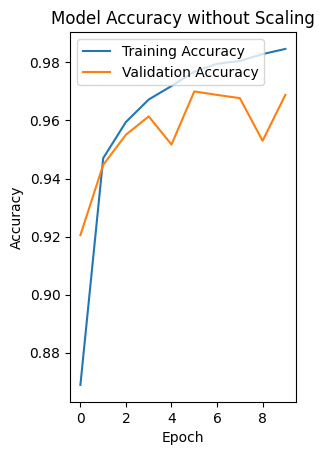

In [32]:
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Training Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy without Scaling')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

In [33]:
print(f"Test Accuracy: {accuracy_original:.4f}")

Test Accuracy: 0.9688
